# **GALAXY MORPHOLOGY CLASSIFICATION USING DEEP LEARNING AND EXPLAINABLE AI**

## **Import Libraries and Initial Loading**

In [ ]:
!pip install imbalanced-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.4/238.4 kB 4.8 MB/s eta 0:00:00


In [ ]:
!pip install lime


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=0e2f141c7fad966acc35d31b755c450645371b9bed72e82970dd5459fba882ff
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
# Python Libraries
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning and Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

# TensorFlow and Keras
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, regularizers, backend as K
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.applications import VGG16, ResNet50
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential, Model, load_model

# OpenCV and PIL for Image Processing
import cv2
from PIL import Image


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Paths for images and labels.
train_images_path = "/content/drive/MyDrive/galaxy-zoo-the-galaxy-challenge v2/images_training_rev1"
labels_path = "/content/drive/MyDrive/galaxy-zoo-the-galaxy-challenge v2/training_solutions_rev1.csv"

## **Preprocessing**

### **Labels**

In [ ]:
labels_df = pd.read_csv(labels_path)

In [ ]:
labels_df.head()

GalaxyID  Class1.1  Class1.2  Class1.3  Class2.1  Class2.2  Class3.1  \
0    100008  0.383147  0.616853  0.000000  0.000000  0.616853  0.038452   
1    100023  0.327001  0.663777  0.009222  0.031178  0.632599  0.467370   
2    100053  0.765717  0.177352  0.056931  0.000000  0.177352  0.000000   
3    100078  0.693377  0.238564  0.068059  0.000000  0.238564  0.109493   
4    100090  0.933839  0.000000  0.066161  0.000000  0.000000  0.000000   

   Class3.2  Class4.1  Class4.2  ...  Class9.3  Class10.1  Class10.2  \
0  0.578401  0.418398  0.198455  ...  0.000000   0.279952   0.138445   
1  0.165229  0.591328  0.041271  ...  0.018764   0.000000   0.131378   
2  0.177352  0.000000  0.177352  ...  0.000000   0.000000   0.000000   
3  0.129071  0.189098  0.049466  ...  0.000000   0.094549   0.000000   
4  0.000000  0.000000  0.000000  ...  0.000000   0.000000   0.000000   

   Class10.3  Class11.1  Class11.2  Class11.3  Class11.4  Class11.5  Class11.6  
0   0.000000   0.000000   0.092886        0.0        0.0        0.0   0.325512  
1   0.459950   0.000000   0.591328        0.0        0.0        0.0   0.000000  
2   0.000000   0.000000   0.000000        0.0        0.0        0.0   0.000000  
3   0.094549   0.189098   0.000000        0.0        0.0        0.0   0.000000  
4   0.000000   0.000000   0.000000        0.0        0.0        0.0   0.000000  

[5 rows x 38 columns]

In [ ]:
labels_df.shape

(61578, 38)

In [ ]:
labels_df['image_path'] = labels_df['GalaxyID'].astype(str) + '.jpg'
labels_df.head()

GalaxyID  Class1.1  Class1.2  Class1.3  Class2.1  Class2.2  Class3.1  \
0    100008  0.383147  0.616853  0.000000  0.000000  0.616853  0.038452   
1    100023  0.327001  0.663777  0.009222  0.031178  0.632599  0.467370   
2    100053  0.765717  0.177352  0.056931  0.000000  0.177352  0.000000   
3    100078  0.693377  0.238564  0.068059  0.000000  0.238564  0.109493   
4    100090  0.933839  0.000000  0.066161  0.000000  0.000000  0.000000   

   Class3.2  Class4.1  Class4.2  ...  Class10.1  Class10.2  Class10.3  \
0  0.578401  0.418398  0.198455  ...   0.279952   0.138445   0.000000   
1  0.165229  0.591328  0.041271  ...   0.000000   0.131378   0.459950   
2  0.177352  0.000000  0.177352  ...   0.000000   0.000000   0.000000   
3  0.129071  0.189098  0.049466  ...   0.094549   0.000000   0.094549   
4  0.000000  0.000000  0.000000  ...   0.000000   0.000000   0.000000   

   Class11.1  Class11.2  Class11.3  Class11.4  Class11.5  Class11.6  \
0   0.000000   0.092886        0.0        0.0        0.0   0.325512   
1   0.000000   0.591328        0.0        0.0        0.0   0.000000   
2   0.000000   0.000000        0.0        0.0        0.0   0.000000   
3   0.189098   0.000000        0.0        0.0        0.0   0.000000   
4   0.000000   0.000000        0.0        0.0        0.0   0.000000   

   image_path  
0  100008.jpg  
1  100023.jpg  
2  100053.jpg  
3  100078.jpg  
4  100090.jpg  

[5 rows x 39 columns]

In [ ]:
labels_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61578 entries, 0 to 61577
Data columns (total 39 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   GalaxyID    61578 non-null  int64  
 1   Class1.1    61578 non-null  float64
 2   Class1.2    61578 non-null  float64
 3   Class1.3    61578 non-null  float64
 4   Class2.1    61578 non-null  float64
 5   Class2.2    61578 non-null  float64
 6   Class3.1    61578 non-null  float64
 7   Class3.2    61578 non-null  float64
 8   Class4.1    61578 non-null  float64
 9   Class4.2    61578 non-null  float64
 10  Class5.1    61578 non-null  float64
 11  Class5.2    61578 non-null  float64
 12  Class5.3    61578 non-null  float64
 13  Class5.4    61578 non-null  float64
 14  Class6.1    61578 non-null  float64
 15  Class6.2    61578 non-null  float64
 16  Class7.1    61578 non-null  float64
 17  Class7.2    61578 non-null  float64
 18  Class7.3    61578 non-null  float64
 19  Class8.1    61578 non-nul

In [ ]:
# missing values
missing_values = labels_df.isnull().sum()

print("Missing Values in Each Column:")
print(missing_values)

if missing_values.sum() > 0:
    print("\nThere are missing values in the dataset.")
else:
    print("\nNo missing values in the dataset.")

Missing Values in Each Column:
GalaxyID      0
Class1.1      0
Class1.2      0
Class1.3      0
Class2.1      0
Class2.2      0
Class3.1      0
Class3.2      0
Class4.1      0
Class4.2      0
Class5.1      0
Class5.2      0
Class5.3      0
Class5.4      0
Class6.1      0
Class6.2      0
Class7.1      0
Class7.2      0
Class7.3      0
Class8.1      0
Class8.2      0
Class8.3      0
Class8.4      0
Class8.5      0
Class8.6      0
Class8.7      0
Class9.1      0
Class9.2      0
Class9.3      0
Class10.1     0
Class10.2     0
Class10.3     0
Class11.1     0
Class11.2     0
Class11.3     0
Class11.4     0
Class11.5     0
Class11.6     0
image_path    0
dtype: int64

No missing values in the dataset.


### **Images**

In [ ]:
# number of images
train_image_count = len(os.listdir(train_images_path))

print(f"Number of images in training folder: {train_image_count}")

Number of images in training folder: 61578


In [ ]:
# list of image file names in the training folder
training_images = set(os.listdir(train_images_path))

filtered_labels_df = labels_df[labels_df['image_path'].isin(training_images)].copy()

filtered_labels_df.reset_index(drop=True, inplace=True)

print(f"Number of images in training folder: {len(training_images)}")
print(f"Number of rows in filtered_labels_df: {filtered_labels_df.shape[0]}")
filtered_labels_df.head()

Number of images in training folder: 61578
Number of rows in filtered_labels_df: 61578


GalaxyID  Class1.1  Class1.2  Class1.3  Class2.1  Class2.2  Class3.1  \
0    100008  0.383147  0.616853  0.000000  0.000000  0.616853  0.038452   
1    100023  0.327001  0.663777  0.009222  0.031178  0.632599  0.467370   
2    100053  0.765717  0.177352  0.056931  0.000000  0.177352  0.000000   
3    100078  0.693377  0.238564  0.068059  0.000000  0.238564  0.109493   
4    100090  0.933839  0.000000  0.066161  0.000000  0.000000  0.000000   

   Class3.2  Class4.1  Class4.2  ...  Class10.1  Class10.2  Class10.3  \
0  0.578401  0.418398  0.198455  ...   0.279952   0.138445   0.000000   
1  0.165229  0.591328  0.041271  ...   0.000000   0.131378   0.459950   
2  0.177352  0.000000  0.177352  ...   0.000000   0.000000   0.000000   
3  0.129071  0.189098  0.049466  ...   0.094549   0.000000   0.094549   
4  0.000000  0.000000  0.000000  ...   0.000000   0.000000   0.000000   

   Class11.1  Class11.2  Class11.3  Class11.4  Class11.5  Class11.6  \
0   0.000000   0.092886        0.0        0.0        0.0   0.325512   
1   0.000000   0.591328        0.0        0.0        0.0   0.000000   
2   0.000000   0.000000        0.0        0.0        0.0   0.000000   
3   0.189098   0.000000        0.0        0.0        0.0   0.000000   
4   0.000000   0.000000        0.0        0.0        0.0   0.000000   

   image_path  
0  100008.jpg  
1  100023.jpg  
2  100053.jpg  
3  100078.jpg  
4  100090.jpg  

[5 rows x 39 columns]

In [ ]:
# Apply thresholds to Spiral and Elliptical galaxies
def refine_classification(row):
    if row['Class1.2'] >= 0.9:
        return 'Spiral'
    elif row['Class1.1'] >= 0.85:
        return 'Elliptical'
    elif row['Class8.3'] > 0.5 or row['Class8.4'] > 0.5 or row['Class8.5'] > 0.5:
        return 'Irregular'
    else:
        return None

filtered_labels_df['Galaxy_Type'] = filtered_labels_df.apply(refine_classification, axis=1)

filtered_galaxies_df = filtered_labels_df[filtered_labels_df['Galaxy_Type'].notna()]

print(filtered_galaxies_df['Galaxy_Type'].value_counts())


Galaxy_Type
Spiral        8776
Elliptical    5110
Irregular      462
Name: count, dtype: int64


In [ ]:
# Create a new DataFrame for Spiral and Elliptical galaxies
spiral_elliptical_df = filtered_galaxies_df[filtered_galaxies_df['Galaxy_Type'].isin(['Spiral', 'Elliptical'])]

print(spiral_elliptical_df.head())

print(len(spiral_elliptical_df))

    GalaxyID  Class1.1  Class1.2  Class1.3  Class2.1  Class2.2  Class3.1  \
4     100090  0.933839  0.000000  0.066161  0.000000  0.000000  0.000000   
8     100134  0.021834  0.976952  0.001214  0.021751  0.955201  0.313077   
19    100322  0.091987  0.908013  0.000000  0.816806  0.091207  0.000000   
22    100380  0.030000  0.970000  0.000000  0.043650  0.926350  0.463175   
35    100520  0.042430  0.957570  0.000000  0.579788  0.377782  0.103912   

    Class3.2  Class4.1  Class4.2  ...  Class10.2  Class10.3  Class11.1  \
4   0.000000  0.000000  0.000000  ...   0.000000   0.000000        0.0   
8   0.642124  0.546491  0.408711  ...   0.152044   0.187194        0.0   
19  0.091207  0.000000  0.091207  ...   0.000000   0.000000        0.0   
22  0.463175  0.926350  0.000000  ...   0.463175   0.000000        0.0   
35  0.273870  0.148593  0.229189  ...   0.000000   0.148593        0.0   

    Class11.2  Class11.3  Class11.4  Class11.5  Class11.6  image_path  \
4    0.000000   0.000000 

In [ ]:
# Create a new DataFrame
new_galaxy_df = spiral_elliptical_df[['GalaxyID','Galaxy_Type', 'image_path']]

print(new_galaxy_df.head())


    GalaxyID Galaxy_Type  image_path
4     100090  Elliptical  100090.jpg
8     100134      Spiral  100134.jpg
19    100322      Spiral  100322.jpg
22    100380      Spiral  100380.jpg
35    100520      Spiral  100520.jpg


In [ ]:
print(f'Total number of galaxies: {len(new_galaxy_df)}')


Total number of galaxies: 13886


In [ ]:
# Apply Label Encoding to the class column in balanced_data
label_encoder = LabelEncoder()
new_galaxy_df['class_encoded'] = label_encoder.fit_transform(new_galaxy_df['Galaxy_Type'])

label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Encoding Mapping:")
print(label_mapping)

print("Balanced DataFrame with Encoded Classes:")
print(new_galaxy_df.head())

Label Encoding Mapping:
{'Elliptical': 0, 'Spiral': 1}
Balanced DataFrame with Encoded Classes:
    GalaxyID Galaxy_Type  image_path  class_encoded
4     100090  Elliptical  100090.jpg              0
8     100134      Spiral  100134.jpg              1
19    100322      Spiral  100322.jpg              1
22    100380      Spiral  100380.jpg              1
35    100520      Spiral  100520.jpg              1


<ipython-input-18-95caf580d9f0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_galaxy_df['class_encoded'] = label_encoder.fit_transform(new_galaxy_df['Galaxy_Type'])


## **EDA**

### **Distribution of galaxies accross Classes**

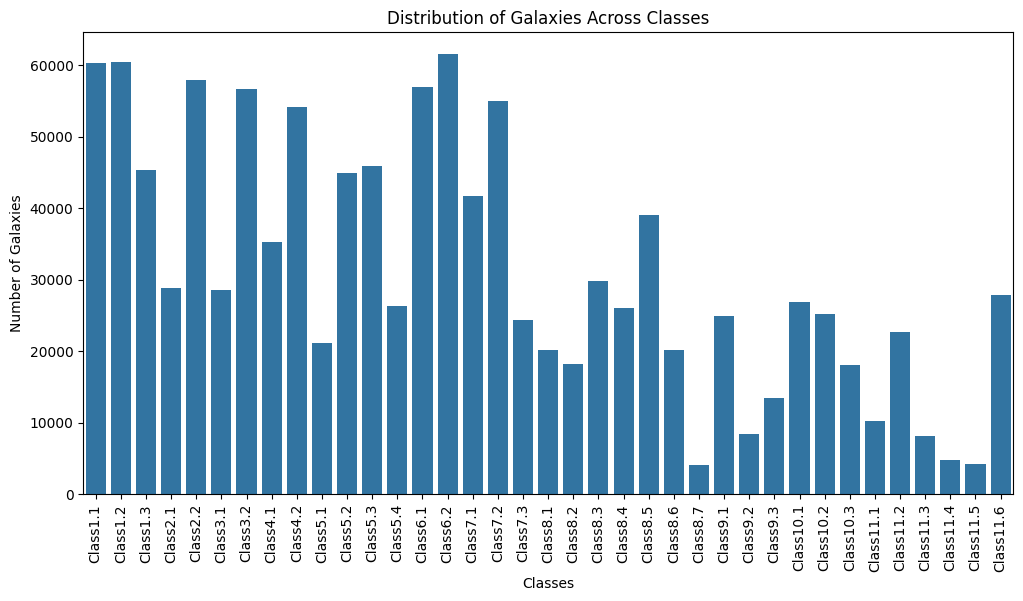

In [ ]:
# Plot distribution of galaxies accross classes
class_columns = [col for col in labels_df.columns if col.startswith('Class')]

class_distribution = labels_df[class_columns].gt(0).sum()

plt.figure(figsize=(12,6))
sns.barplot(x=class_distribution.index, y=class_distribution.values)
plt.xticks(rotation=90)
plt.xlabel('Classes')
plt.ylabel('Number of Galaxies')
plt.title('Distribution of Galaxies Across Classes')
plt.show()

### **Distribution of galaxy types**

<ipython-input-20-1656e9aa24f4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=filtered_galaxies_df, x='Galaxy_Type', palette='Set2')


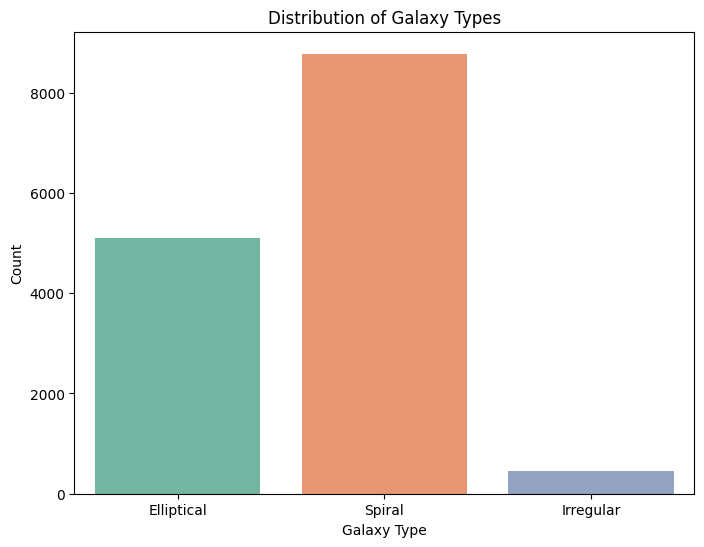

In [ ]:
# Plot the distribution of galaxy types
plt.figure(figsize=(8, 6))
sns.countplot(data=filtered_galaxies_df, x='Galaxy_Type', palette='Set2')
plt.title('Distribution of Galaxy Types')
plt.xlabel('Galaxy Type')
plt.ylabel('Count')
plt.show()


### **Analyse Image Brightness**

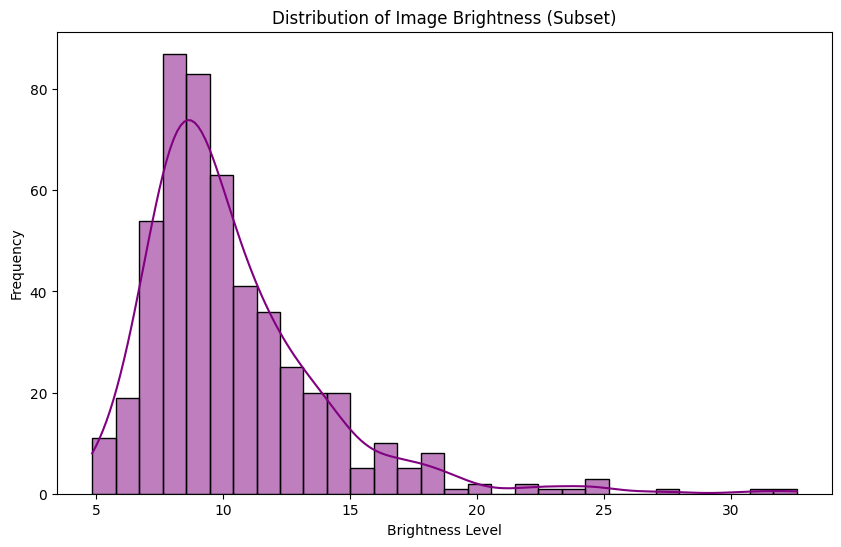

In [ ]:
# Plot Analyze image brightness
brightness_levels = []
for img_name in selected_images:
    img_path = os.path.join(train_images_path, img_name)
    img = Image.open(img_path).convert('L')  # Convert to grayscale
    brightness_levels.append(np.mean(np.array(img)))

plt.figure(figsize=(10, 6))
sns.histplot(brightness_levels, bins=30, kde=True, color='purple')
plt.title('Distribution of Image Brightness (Subset)')
plt.xlabel('Brightness Level')
plt.ylabel('Frequency')
plt.show()

### **Analyse Mean and standard**

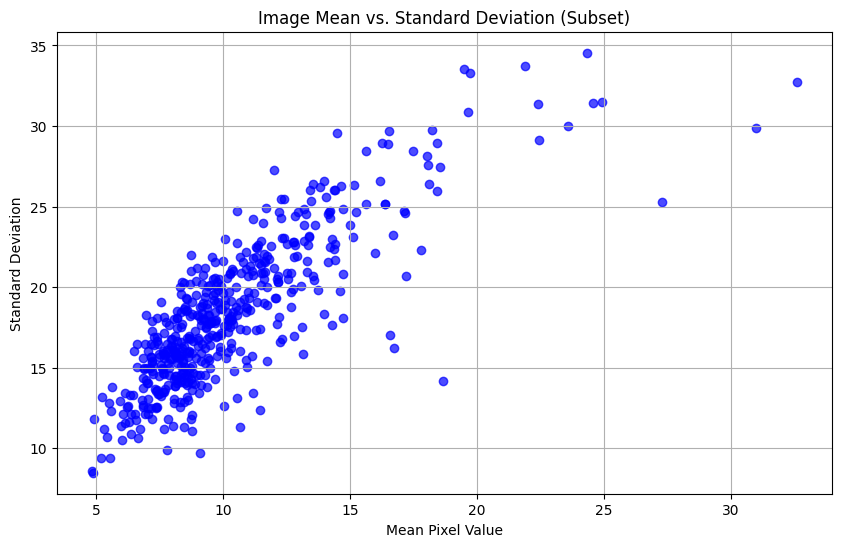

In [ ]:
# Plot mean and standard deviation of pixel values
means, stds = [], []
for img_name in selected_images:
    img_path = os.path.join(train_images_path, img_name)
    img = Image.open(img_path).convert('L')  # Convert to grayscale
    pixel_values = np.array(img).flatten()
    means.append(np.mean(pixel_values))
    stds.append(np.std(pixel_values))

plt.figure(figsize=(10, 6))
plt.scatter(means, stds, c='blue', alpha=0.7)
plt.title('Image Mean vs. Standard Deviation (Subset)')
plt.xlabel('Mean Pixel Value')
plt.ylabel('Standard Deviation')
plt.grid(True)
plt.show()

### **Display images from spiral and elliptical**

Spiral Galaxy Images:


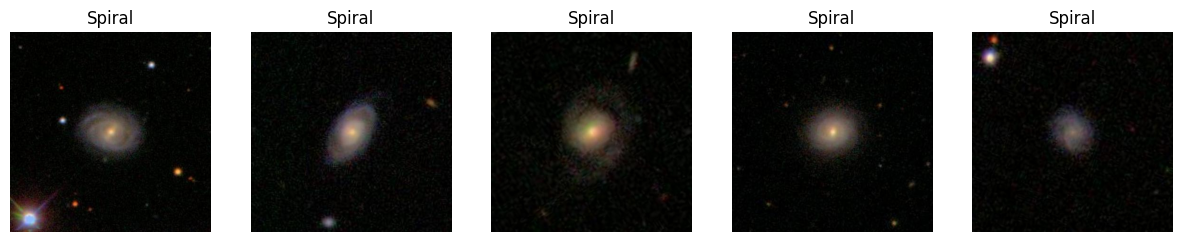

Elliptical Galaxy Images:


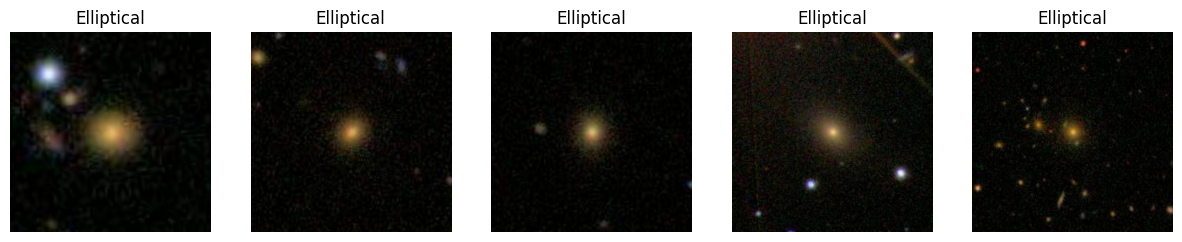

In [ ]:
# display images from spiral and eliptical
def display_images_from_class(folder_path, class_name, num_images=5):
    class_folder = os.path.join(folder_path, class_name)
    image_files = os.listdir(class_folder)

    plt.figure(figsize=(15, 5))
    for i, img_file in enumerate(image_files[:num_images]):
        img_path = os.path.join(class_folder, img_file)
        img = Image.open(img_path)

        plt.subplot(1, num_images, i + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(class_name)
    plt.show()

print("Spiral Galaxy Images:")
display_images_from_class(train_dir, 'Spiral', num_images=5)

print("Elliptical Galaxy Images:")
display_images_from_class(train_dir, 'Elliptical', num_images=5)

## **Data Splitting**

In [ ]:
# Limit Images to 3000
limited_data = []

for class_label in new_galaxy_df['class_encoded'].unique():
    class_data = new_galaxy_df[new_galaxy_df['class_encoded'] == class_label]
    class_data_limited = class_data.head(3000)
    limited_data.append(class_data_limited)

limited_df = pd.concat(limited_data)

In [ ]:
class_distribution = limited_df['class_encoded'].value_counts()

print("Class Distribution in Limited DataFrame:")
print(class_distribution)

Class Distribution in Limited DataFrame:
class_encoded
0    3000
1    3000
Name: count, dtype: int64


In [ ]:
# Create directories for split data
base_dir = "/content/drive/MyDrive/galaxy-zoo-the-galaxy-challenge v2/split_data"
train_dir = os.path.join(base_dir, "training")
val_dir = os.path.join(base_dir, "validation")
test_dir = os.path.join(base_dir, "testing")

In [ ]:
# Create subdirectories for each class
classes = ['Spiral', 'Elliptical']
for split in [train_dir, val_dir, test_dir]:
    os.makedirs(split, exist_ok=True)
    for cls in classes:
        os.makedirs(os.path.join(split, cls), exist_ok=True)

In [ ]:
# Split the data
X = limited_df['image_path']
y = limited_df['Galaxy_Type']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

def copy_images(image_paths, labels, dest_dir):
    for image_path, label in zip(image_paths, labels):
        src = os.path.join(train_images_path, image_path)
        dest = os.path.join(dest_dir, label, image_path)
        shutil.copy(src, dest)

# Copy images to the split directories
copy_images(X_train, y_train, train_dir)
copy_images(X_val, y_val, val_dir)
copy_images(X_test, y_test, test_dir)

print("Images successfully split and saved into folders:")
print(f"Training: {len(X_train)} images")
print(f"Validation: {len(X_val)} images")
print(f"Testing: {len(X_test)} images")
"""

Images successfully split and saved into folders:
Training: 4200 images
Validation: 900 images
Testing: 900 images


## **Augmentation**

In [ ]:
# Load directories
train_dir = ("/content/drive/MyDrive/galaxy-zoo-the-galaxy-challenge v2/split_data/training")
val_dir = ("/content/drive/MyDrive/galaxy-zoo-the-galaxy-challenge v2/split_data/validation")
test_dir = ("/content/drive/MyDrive/galaxy-zoo-the-galaxy-challenge v2/split_data/testing")

In [ ]:
# Data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],
    fill_mode='nearest'
)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical',
    shuffle=False
)

Found 4200 images belonging to 2 classes.
Found 900 images belonging to 2 classes.
Found 900 images belonging to 2 classes.


## **Model 1: VGG16**

### **Initialisation**

In [ ]:
# Load the VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the convolutional base
for layer in base_model.layers[:-8]:
    layer.trainable = False


58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
# Add custom layers
inputs = base_model.input
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
x = Dense(512, activation='relu')(x)
x = Dense(256, activation='relu')(x)
outputs = Dense(2, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)

In [ ]:
# Compile model
model.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Model summary
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
# Callbacks
checkpoint_path = "/content/drive/MyDrive/galaxy-zoo-the-galaxy-challenge v2/VGG16_best_model.h5"
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint(checkpoint_path, monitor='val_loss', save_best_only=True)
]

### **Training**

In [ ]:
# Train model
history = model.fit(
    train_generator,
    epochs=15,
    validation_data=val_generator,
    callbacks=callbacks
)


Epoch 1/15
66/66 [==============================] - ETA: 0s - loss: 0.6187 - accuracy: 0.6533

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


66/66 [==============================] - 207s 3s/step - loss: 0.6187 - accuracy: 0.6533 - val_loss: 0.3033 - val_accuracy: 0.9022
Epoch 2/15
66/66 [==============================] - 202s 3s/step - loss: 0.2671 - accuracy: 0.9033 - val_loss: 0.1245 - val_accuracy: 0.9511
Epoch 3/15
66/66 [==============================] - 203s 3s/step - loss: 0.1457 - accuracy: 0.9498 - val_loss: 0.0840 - val_accuracy: 0.9678
Epoch 4/15
66/66 [==============================] - 203s 3s/step - loss: 0.0946 - accuracy: 0.9693 - val_loss: 0.0749 - val_accuracy: 0.9744
Epoch 5/15
66/66 [==============================] - 203s 3s/step - loss: 0.0836 - accuracy: 0.9702 - val_loss: 0.0647 - val_accuracy: 0.9733
Epoch 6/15
66/66 [==============================] - 201s 3s/step - loss: 0.0752 - accuracy: 0.9745 - val_loss: 0.0695 - val_accuracy: 0.9744
Epoch 7/15
66/66 [==============================] - 202s 3s/step - loss: 0.0688 - accuracy: 0.9776 - val_loss: 0.0592 - val_accuracy: 0.9756
Epoch 8/15
66/66 [======

In [ ]:
# Save model
model.save("/content/drive/MyDrive/galaxy-zoo-the-galaxy-challenge v2/VGG16_model.h5")


In [ ]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


15/15 [==============================] - 16s 1s/step - loss: 0.0333 - accuracy: 0.9889
Test Loss: 0.0333235003054142
Test Accuracy: 0.9888888597488403


### **Validation**

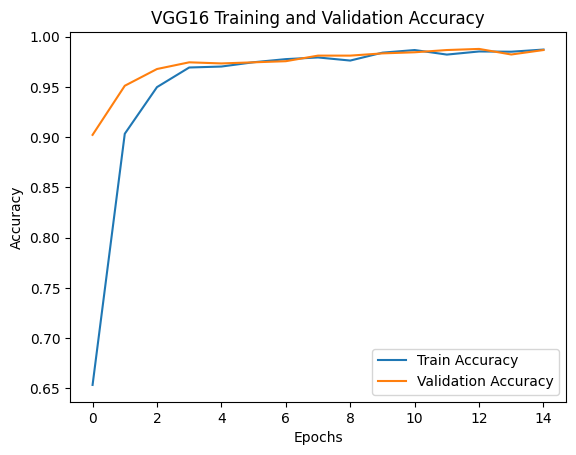

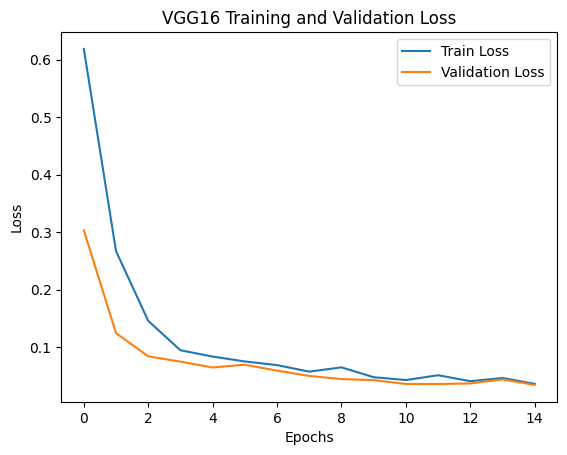

In [ ]:
# Accuracy plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('VGG16 Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('VGG16 Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### **Prediction**

15/15 [==============================] - 249s 17s/step


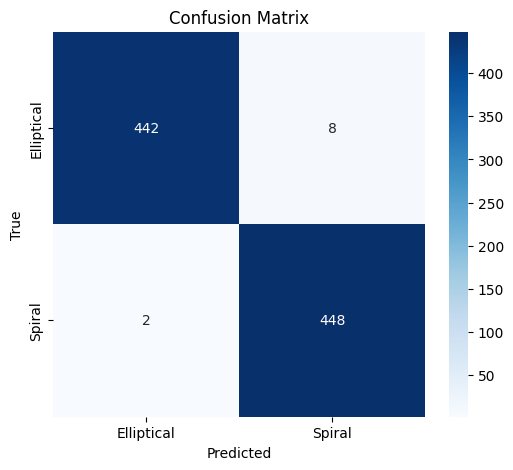

Classification Report:
              precision    recall  f1-score   support

  Elliptical       1.00      0.98      0.99       450
      Spiral       0.98      1.00      0.99       450

    accuracy                           0.99       900
   macro avg       0.99      0.99      0.99       900
weighted avg       0.99      0.99      0.99       900



In [ ]:
# Generate predictions
y_pred_vgg16 = vgg16_model.predict(test_generator)
y_pred_classes_vgg16 = np.argmax(y_pred_vgg16, axis=1)
y_true_vgg16 = test_generator.classes

# Confusion matrix
cm = confusion_matrix(y_true_vgg16, y_pred_classes_vgg16)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print("Classification Report:")
print(classification_report(y_true_vgg16, y_pred_classes_vgg16, target_names=test_generator.class_indices.keys()))


1/1 [==============================] - 1s 543ms/step


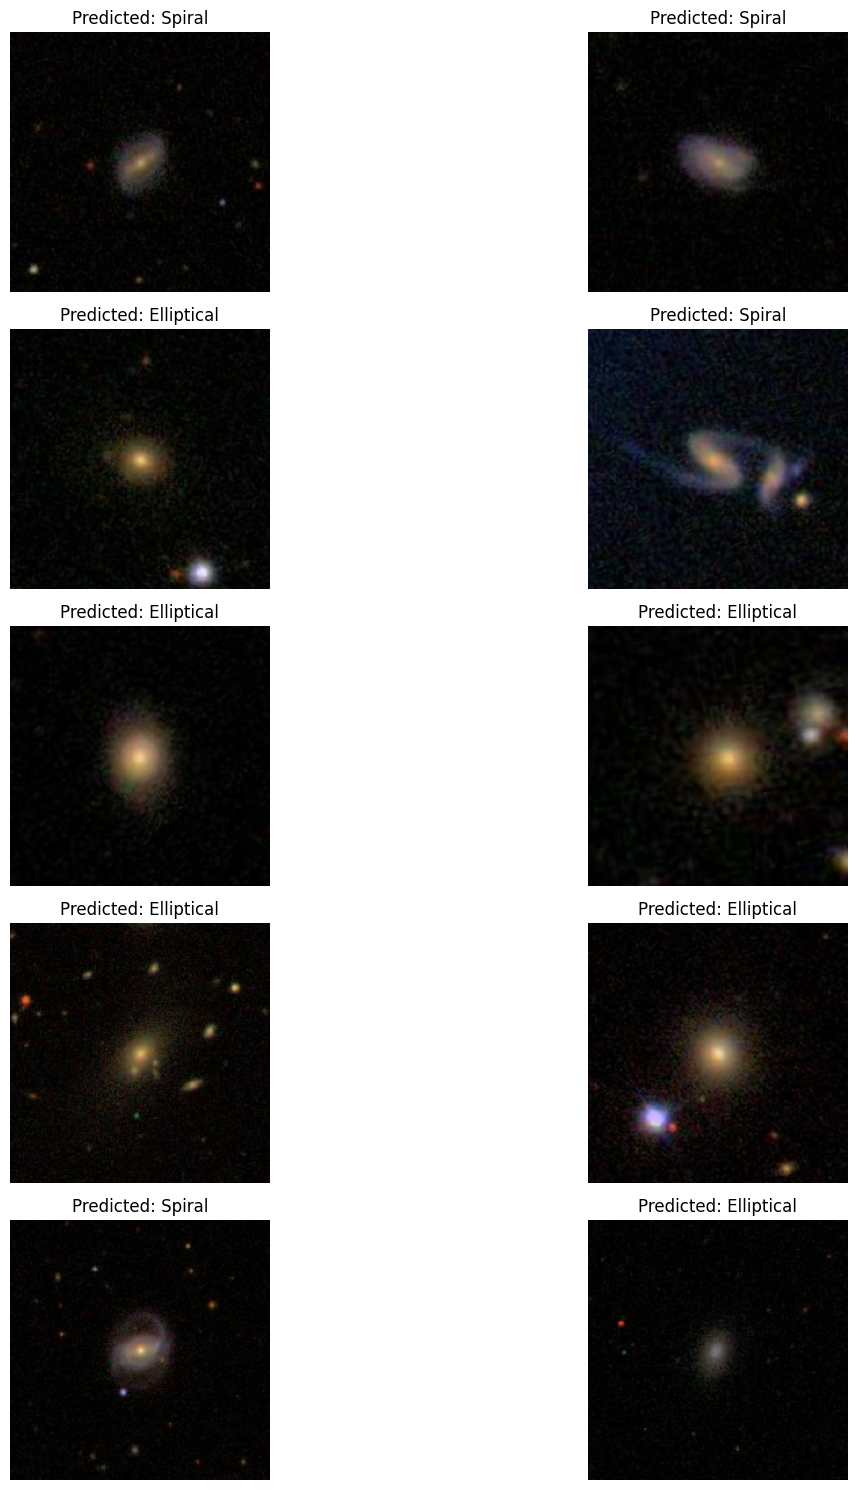

In [ ]:
class_labels = list(test_generator.class_indices.keys())
test_images_dir = test_dir

# Function to load and preprocess a single image
def preprocess_image(image_path):
    img = load_img(image_path, target_size=(224, 224))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0
    return img, img_array

# Select 10 random images from the test set
all_test_images = []
for root, dirs, files in os.walk(test_images_dir):
    for file in files:
        if file.endswith(('.jpg', '.jpeg', '.png')):
            all_test_images.append(os.path.join(root, file))

random_images = random.sample(all_test_images, 10)

# Predict and display the images
plt.figure(figsize=(15, 15))

for i, image_path in enumerate(random_images):
    original_img, preprocessed_img = preprocess_image(image_path)

    # Make predictions
    prediction = vgg16_model.predict(preprocessed_img)
    predicted_class = np.argmax(prediction)
    predicted_label = class_labels[predicted_class]

    # Display images
    plt.subplot(5, 2, i + 1)
    plt.imshow(original_img)
    plt.title(f"Predicted: {predicted_label}")
    plt.axis('off')

plt.tight_layout()
plt.show()


## **Model 2: RESNE50:**

### **Initialisation**

In [ ]:
# Load ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze initial layers
for layer in base_model.layers[:-8]:
    layer.trainable = False


94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
# Add custom layers
inputs = base_model.input
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
x = Dense(512, activation='relu')(x)
x = Dense(256, activation='relu')(x)
outputs = Dense(2, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)

In [ ]:
# Compile  model
model.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Model summary
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                        

In [ ]:
# Callbacks
checkpoint_path = "/content/drive/MyDrive/galaxy-zoo-the-galaxy-challenge v2/ResNet50_model.h5"
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint(checkpoint_path, monitor='val_loss', save_best_only=True)
]

### **Training**

In [ ]:
# Train the model
history = model.fit(
    train_generator,
    epochs=15,
    validation_data=val_generator,
    callbacks=callbacks
)

Epoch 1/15
66/66 [==============================] - ETA: 0s - loss: 0.7035 - accuracy: 0.5010

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


66/66 [==============================] - 122s 2s/step - loss: 0.7035 - accuracy: 0.5010 - val_loss: 0.6928 - val_accuracy: 0.5000
Epoch 2/15
66/66 [==============================] - 117s 2s/step - loss: 0.6954 - accuracy: 0.5145 - val_loss: 0.6942 - val_accuracy: 0.5000
Epoch 3/15
66/66 [==============================] - 117s 2s/step - loss: 0.6944 - accuracy: 0.5160 - val_loss: 0.7005 - val_accuracy: 0.5000
Epoch 4/15
66/66 [==============================] - 118s 2s/step - loss: 0.6922 - accuracy: 0.5317 - val_loss: 0.6901 - val_accuracy: 0.5000
Epoch 5/15
66/66 [==============================] - 117s 2s/step - loss: 0.6902 - accuracy: 0.5350 - val_loss: 0.6916 - val_accuracy: 0.5000
Epoch 6/15
66/66 [==============================] - 117s 2s/step - loss: 0.6869 - accuracy: 0.5464 - val_loss: 0.6806 - val_accuracy: 0.5044
Epoch 7/15
66/66 [==============================] - 117s 2s/step - loss: 0.6825 - accuracy: 0.5588 - val_loss: 0.6741 - val_accuracy: 0.5300
Epoch 8/15
66/66 [======

In [ ]:
# Save model
model.save("/content/drive/MyDrive/galaxy-zoo-the-galaxy-challenge v2/ResNet50_model.h5")

In [ ]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

15/15 [==============================] - 16s 1s/step - loss: 0.6232 - accuracy: 0.6689
Test Loss: 0.6231598854064941
Test Accuracy: 0.6688888669013977


### **Validation**

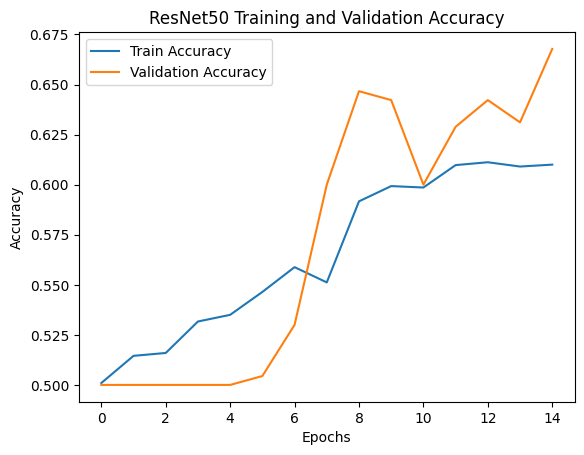

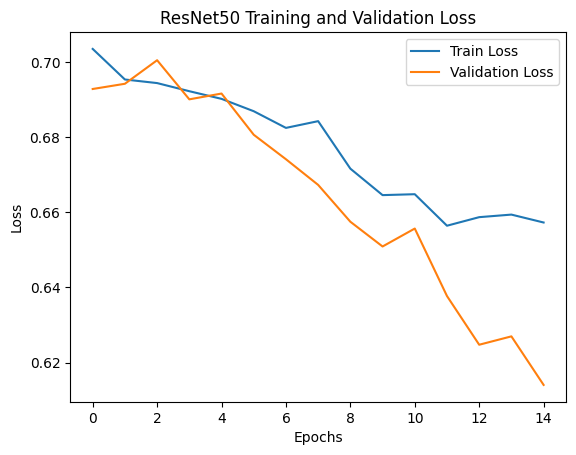

In [ ]:
# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('ResNet50 Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('ResNet50 Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()"""

### **Prediction**

15/15 [==============================] - 147s 10s/step


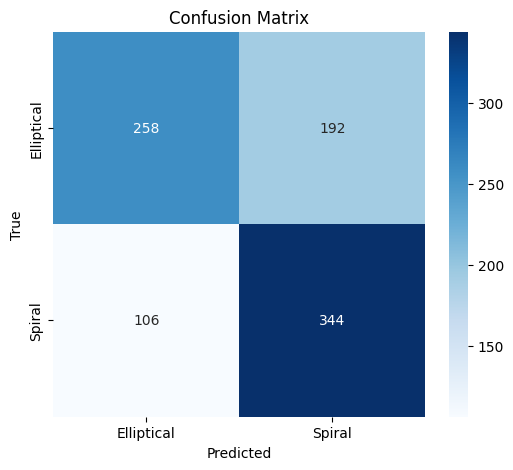

In [ ]:
# Confusion matrix
y_pred_resnet50 = resnet50_model.predict(test_generator)
y_pred_classes_resnet50 = np.argmax(y_pred_resnet50, axis=1)
y_true_resnet50 = test_generator.classes

cm = confusion_matrix(y_true_resnet50, y_pred_classes_resnet50)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Classification report
print("Classification Report:")
print(classification_report(y_true_resnet50, y_pred_classes_resnet50, target_names=test_generator.class_indices.keys()))


Classification Report:
              precision    recall  f1-score   support

  Elliptical       0.71      0.57      0.63       450
      Spiral       0.64      0.76      0.70       450

    accuracy                           0.67       900
   macro avg       0.68      0.67      0.67       900
weighted avg       0.68      0.67      0.67       900



1/1 [==============================] - 0s 338ms/step


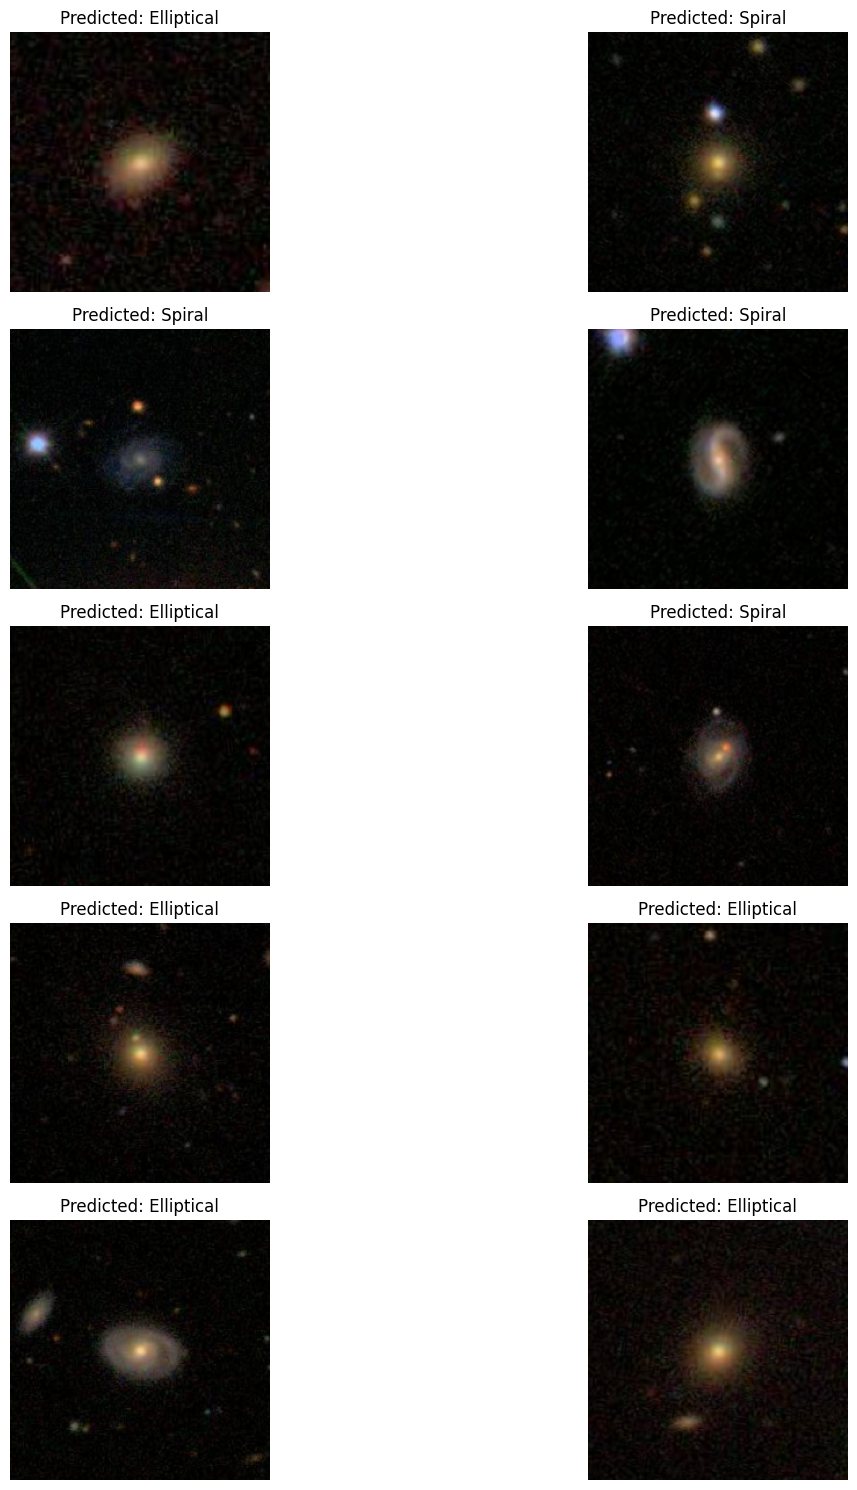

In [ ]:
# Predict 10 random images
class_labels = list(test_generator.class_indices.keys())

def preprocess_image(image_path):
    img = load_img(image_path, target_size=(224, 224))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0
    return img, img_array

all_test_images = []
for root, dirs, files in os.walk(test_dir):
    for file in files:
        if file.endswith(('.jpg', '.jpeg', '.png')):
            all_test_images.append(os.path.join(root, file))

random_images = random.sample(all_test_images, 10)

plt.figure(figsize=(15, 15))
for i, image_path in enumerate(random_images):
    original_img, preprocessed_img = preprocess_image(image_path)
    prediction = resnet50_model.predict(preprocessed_img)
    predicted_class = np.argmax(prediction)
    predicted_label = class_labels[predicted_class]

    plt.subplot(5, 2, i + 1)
    plt.imshow(original_img)
    plt.title(f"Predicted: {predicted_label}")
    plt.axis('off')

plt.tight_layout()
plt.show()


## **Model 3: Custom_CNN**

### **Initialisation**

In [ ]:
# Custom CNN model
def create_custom_cnn():
    model = Sequential([
        # Convolutional layers
        Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
        MaxPooling2D((2, 2)),

        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),

        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),

        # Fully connected layers
        Flatten(),
        Dense(512, activation='relu'),
        Dropout(0.3),
        Dense(256, activation='relu'),
        Dropout(0.3),
        Dense(2, activation='softmax')
    ])
    return model

In [ ]:
# Create model
model = create_custom_cnn()

# Compile model
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)       0

In [ ]:
# Callbacks
checkpoint_path = "/content/drive/MyDrive/galaxy-zoo-the-galaxy-challenge v2/CustomCNN_model.h5"
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint(checkpoint_path, monitor='val_loss', save_best_only=True)
]


### **Training**

In [ ]:
# Train  model
history = model.fit(
    train_generator,
    epochs=15,
    validation_data=val_generator,
    callbacks=callbacks
)

Epoch 1/15
66/66 [==============================] - ETA: 0s - loss: 0.6103 - accuracy: 0.6564

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


66/66 [==============================] - 95s 1s/step - loss: 0.6103 - accuracy: 0.6564 - val_loss: 0.4362 - val_accuracy: 0.8367
Epoch 2/15
66/66 [==============================] - 98s 1s/step - loss: 0.4823 - accuracy: 0.7931 - val_loss: 0.3923 - val_accuracy: 0.8378
Epoch 3/15
66/66 [==============================] - 98s 1s/step - loss: 0.4161 - accuracy: 0.8233 - val_loss: 0.3355 - val_accuracy: 0.8667
Epoch 4/15
66/66 [==============================] - 98s 1s/step - loss: 0.3711 - accuracy: 0.8460 - val_loss: 0.2732 - val_accuracy: 0.8911
Epoch 5/15
66/66 [==============================] - 100s 1s/step - loss: 0.3291 - accuracy: 0.8688 - val_loss: 0.2451 - val_accuracy: 0.8989
Epoch 6/15
66/66 [==============================] - 96s 1s/step - loss: 0.3160 - accuracy: 0.8743 - val_loss: 0.2499 - val_accuracy: 0.9089
Epoch 7/15
66/66 [==============================] - 93s 1s/step - loss: 0.2933 - accuracy: 0.8805 - val_loss: 0.2242 - val_accuracy: 0.9156
Epoch 8/15
66/66 [============

In [ ]:
# Save model
model.save("/content/drive/MyDrive/galaxy-zoo-the-galaxy-challenge v2/CustomCNN_model.h5")

In [ ]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

15/15 [==============================] - 5s 332ms/step - loss: 0.1928 - accuracy: 0.9189
Test Loss: 0.19279395043849945
Test Accuracy: 0.9188888669013977


### **Validation**

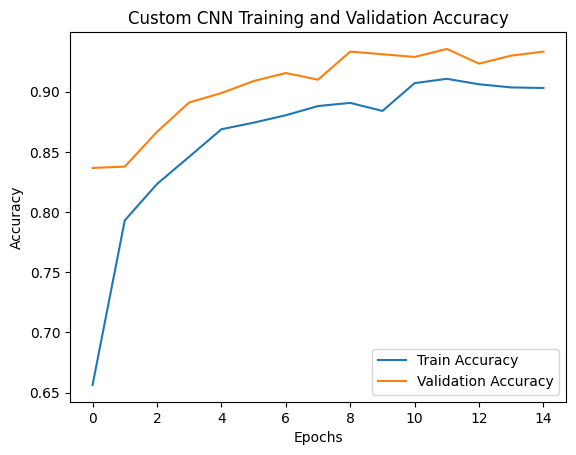

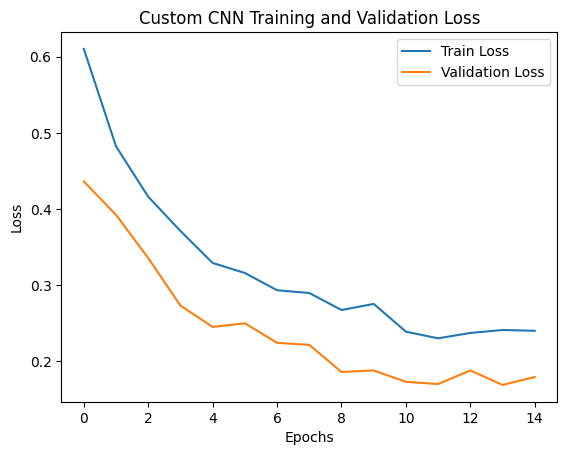

In [ ]:
# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Custom CNN Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Custom CNN Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### **Prediction**

15/15 [==============================] - 22s 1s/step


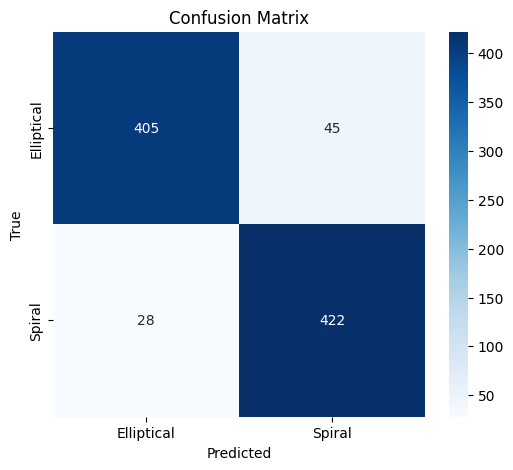

In [ ]:
# Confusion matrix
y_pred_customcnn = custom_cnn_model.predict(test_generator)
y_pred_classes_customcnn = np.argmax(y_pred_customcnn, axis=1)
y_true_customcnn = test_generator.classes

cm = confusion_matrix(y_true_customcnn, y_pred_classes_customcnn)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Classification report
print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices.keys()))

Classification Report:
              precision    recall  f1-score   support

  Elliptical       0.94      0.90      0.92       450
      Spiral       0.90      0.94      0.92       450

    accuracy                           0.92       900
   macro avg       0.92      0.92      0.92       900
weighted avg       0.92      0.92      0.92       900



1/1 [==============================] - 0s 60ms/step


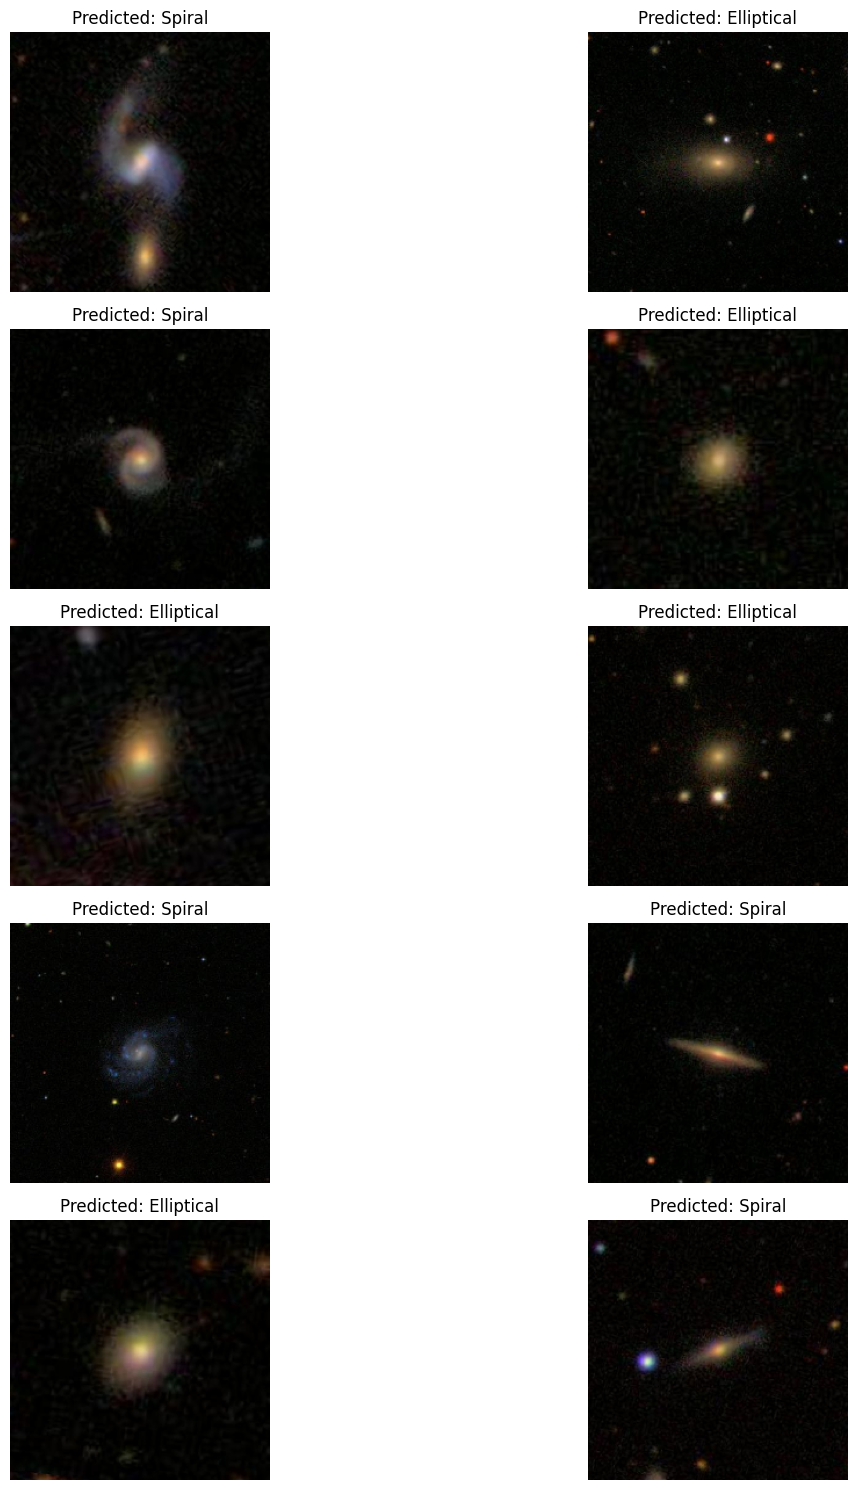

In [ ]:
# Predict 10 random images
class_labels = list(test_generator.class_indices.keys())

def preprocess_image(image_path):
    img = load_img(image_path, target_size=(224, 224))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0
    return img, img_array

all_test_images = []
for root, dirs, files in os.walk(test_dir):
    for file in files:
        if file.endswith(('.jpg', '.jpeg', '.png')):
            all_test_images.append(os.path.join(root, file))

random_images = random.sample(all_test_images, 10)

plt.figure(figsize=(15, 15))
for i, image_path in enumerate(random_images):
    original_img, preprocessed_img = preprocess_image(image_path)
    prediction = custom_cnn_model.predict(preprocessed_img)
    predicted_class = np.argmax(prediction)
    predicted_label = class_labels[predicted_class]

    plt.subplot(5, 2, i + 1)
    plt.imshow(original_img)
    plt.title(f"Predicted: {predicted_label}")
    plt.axis('off')

plt.tight_layout()
plt.show()

# **Explaianable AI**

In [ ]:
# Load Models
vgg16_model = load_model("/content/drive/MyDrive/galaxy-zoo-the-galaxy-challenge v2/VGG16_model.h5")
resnet50_model = load_model("/content/drive/MyDrive/galaxy-zoo-the-galaxy-challenge v2/ResNet50_model.h5")
custom_cnn_model = load_model("/content/drive/MyDrive/galaxy-zoo-the-galaxy-challenge v2/CustomCNN_model.h5")

## **Grad Cam**

1/1 [==============================] - 0s 73ms/step


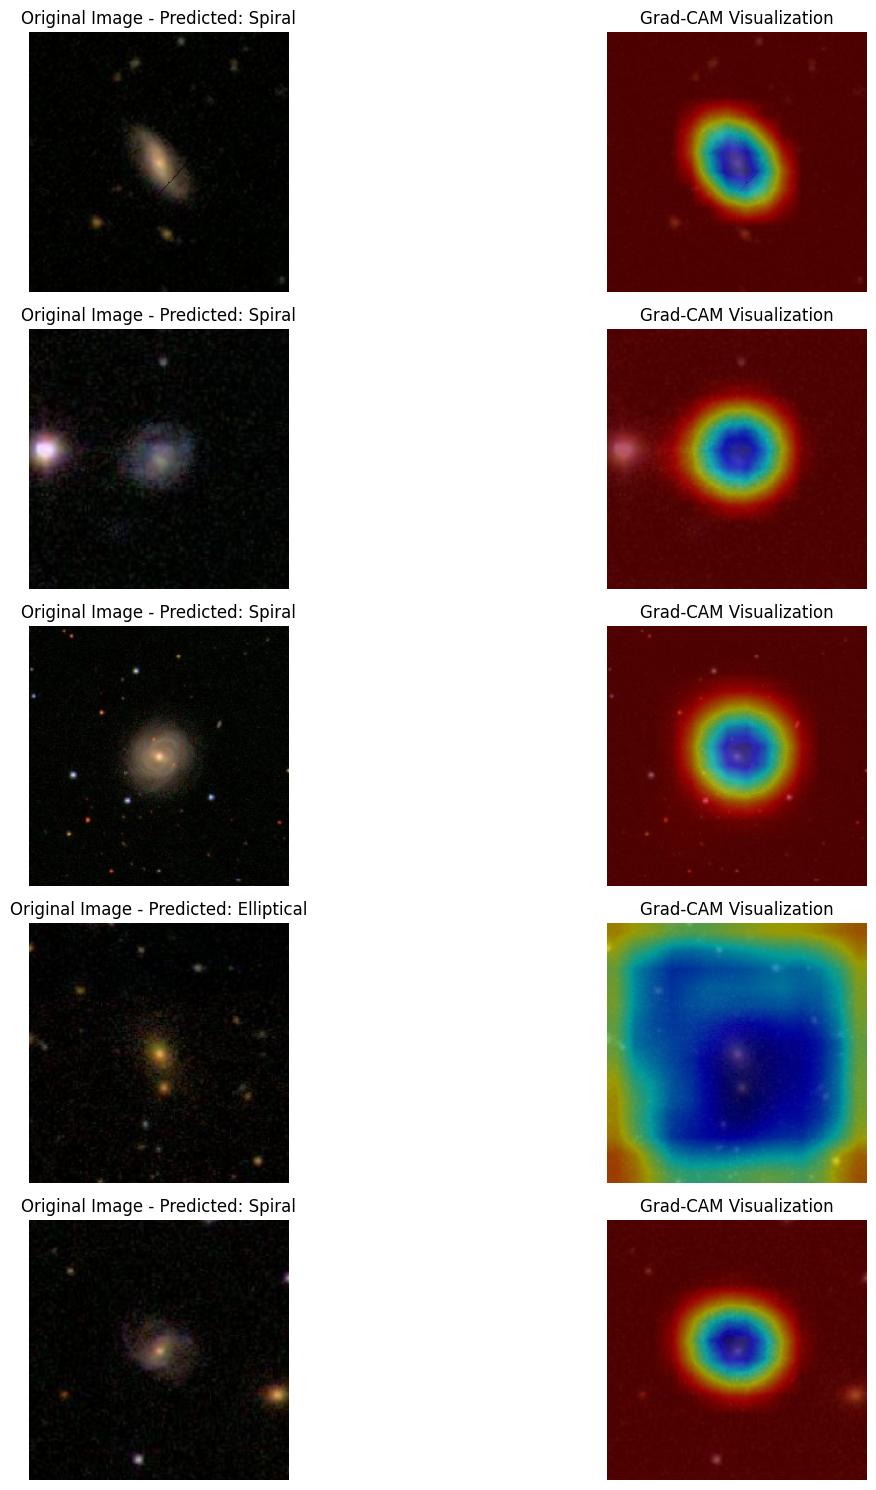

In [ ]:
class_labels = list(test_generator.class_indices.keys())

# Define the Grad-CAM function
def grad_cam(model, image_path, class_idx, last_conv_layer_name="conv5_block3_out"):

    # Load and preprocess the image
    img = load_img(image_path, target_size=(224, 224))
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    grad_model = tf.keras.models.Model(
        [model.inputs],
        [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Get the feature maps and predictions
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        loss = predictions[:, class_idx]

    # Compute the gradients of the target class
    grads = tape.gradient(loss, conv_outputs)

    # Compute the mean intensity of the gradients
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # Multiply each feature map by the mean intensity of its gradient
    conv_outputs = conv_outputs[0]
    heatmap = tf.reduce_sum(tf.multiply(pooled_grads, conv_outputs), axis=-1)

    # Normalize the heatmap
    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap)

    return heatmap, img

# Function to overlay heatmap on the original image
def overlay_heatmap(heatmap, original_image, alpha=0.6, colormap=cv2.COLORMAP_JET):

    original_image = np.array(original_image)

    # Resize the heatmap to match the image size
    heatmap = cv2.resize(heatmap, (original_image.shape[1], original_image.shape[0]))

    # Apply the colormap
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, colormap)

    # Combine the heatmap with the original image
    overlay_image = cv2.addWeighted(heatmap, alpha, original_image, 1 - alpha, 0)

    return overlay_image

all_test_images = []
for root, dirs, files in os.walk(test_dir):
    for file in files:
        if file.endswith(('.jpg', '.jpeg', '.png')):
            all_test_images.append(os.path.join(root, file))

# Choose 5 random test images
random_images = random.sample(all_test_images, 5)

plt.figure(figsize=(15, 15))

for i, image_path in enumerate(random_images):
    # Preprocess the image and make a prediction
    img, img_array = preprocess_image(image_path)
    predictions = vgg16_model.predict(img_array)
    predicted_class = np.argmax(predictions)

    # Generate Grad-CAM heatmap
    heatmap, original_img = grad_cam(vgg16_model, image_path, predicted_class, last_conv_layer_name="block5_conv3")

    # Overlay heatmap on the original image
    overlay_img = overlay_heatmap(heatmap, original_img)

    # Display the original image and Grad-CAM result
    plt.subplot(5, 2, i * 2 + 1)
    plt.imshow(original_img)
    plt.title(f"Original Image - Predicted: {class_labels[predicted_class]}")
    plt.axis('off')

    plt.subplot(5, 2, i * 2 + 2)
    plt.imshow(overlay_img)
    plt.title("Grad-CAM Visualization")
    plt.axis('off')

plt.tight_layout()
plt.show()

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 95ms/step


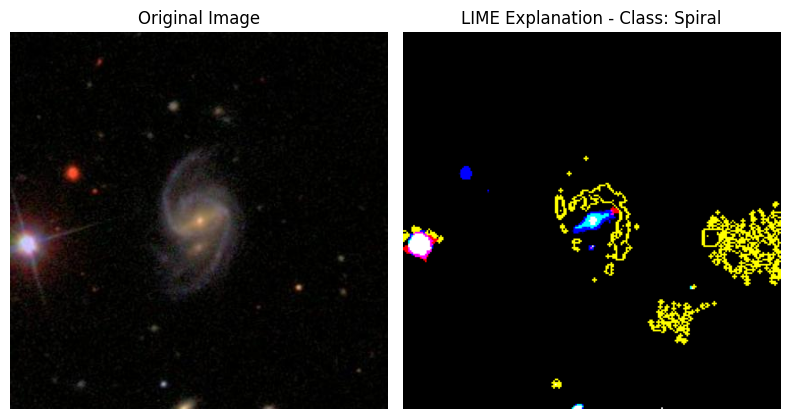

In [ ]:
# Function to preprocess image for LIME
def lime_preprocess_image(image_path):
    img = load_img(image_path, target_size=(224, 224))
    img_array = img_to_array(img)
    img_array = preprocess_input(img_array)
    return img_array

# Wrapper function for predictions
def lime_predict(images):
    return vgg16_model.predict(images)

# LIME explanation function
def explain_with_lime(image_path, num_samples=1000):

    # Preprocess the image for LIME
    img_array = lime_preprocess_image(image_path)
    img_batch = np.expand_dims(img_array, axis=0)

    # Initialize LIME image explainer
    explainer = lime_image.LimeImageExplainer()

    # explanation
    explanation = explainer.explain_instance(
        img_array.astype('double'),
        lime_predict,
        top_labels=2,
        hide_color=0,
        num_samples=num_samples
    )

    # Get explanation for the predicted class
    predicted_class = np.argmax(lime_predict(img_batch))
    temp, mask = explanation.get_image_and_mask(
        predicted_class,
        positive_only=True,
        num_features=10,
        hide_rest=False
    )

    # Display the result
    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.imshow(load_img(image_path))
    plt.title("Original Image")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(mark_boundaries(temp, mask))
    plt.title(f"LIME Explanation - Class: {class_labels[predicted_class]}")
    plt.axis('off')

    plt.tight_layout()
    plt.show()

image_path = random.choice(all_test_images)
explain_with_lime(image_path)


## **Model Comparison**

## **ROC AUC Curve**

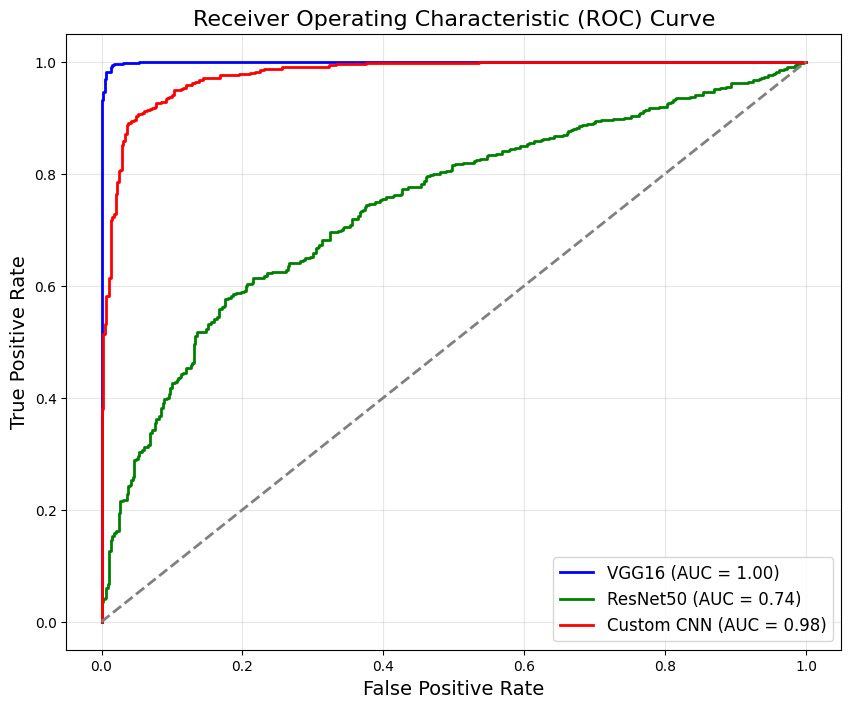

VGG16 AUC-ROC Score: 1.00
ResNet50 AUC-ROC Score: 0.74
Custom CNN AUC-ROC Score: 0.98


In [ ]:
# ROC AUC curve
y_pred_prob_vgg16 = y_pred_vgg16[:, 1]
y_pred_prob_resnet50 = y_pred_resnet50[:, 1]
y_pred_prob_customcnn = y_pred_customcnn[:, 1]

# Calculate
fpr_vgg16, tpr_vgg16, _ = roc_curve(y_true_vgg16, y_pred_prob_vgg16)
roc_auc_vgg16 = auc(fpr_vgg16, tpr_vgg16)

fpr_resnet50, tpr_resnet50, _ = roc_curve(y_true_vgg16, y_pred_prob_resnet50)
roc_auc_resnet50 = auc(fpr_resnet50, tpr_resnet50)

fpr_customcnn, tpr_customcnn, _ = roc_curve(y_true_customcnn, y_pred_prob_customcnn)
roc_auc_customcnn = auc(fpr_customcnn, tpr_customcnn)

# Plot
plt.figure(figsize=(10, 8))

# VGG16 ROC curve
plt.plot(fpr_vgg16, tpr_vgg16, color='blue', lw=2, label=f'VGG16 (AUC = {roc_auc_vgg16:.2f})')

# ResNet50 ROC curve
plt.plot(fpr_resnet50, tpr_resnet50, color='green', lw=2, label=f'ResNet50 (AUC = {roc_auc_resnet50:.2f})')

# Custom CNN ROC curve
plt.plot(fpr_customcnn, tpr_customcnn, color='red', lw=2, label=f'Custom CNN (AUC = {roc_auc_customcnn:.2f})')

# Plot the diagonal line
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)

# Plot
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16)
plt.legend(loc="lower right", fontsize=12)
plt.grid(alpha=0.3)
plt.show()

# Print
print(f"VGG16 AUC-ROC Score: {roc_auc_vgg16:.2f}")
print(f"ResNet50 AUC-ROC Score: {roc_auc_resnet50:.2f}")
print(f"Custom CNN AUC-ROC Score: {roc_auc_customcnn:.2f}")
